<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/7.%20Deep%20Learning%20CNN/3_DeepLearning_ConvolutionNeuralNetworks_CATSDOGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning For Object Detection and Image Classification

<h3 align='center'> Deep Learning on Custom Images </h3>

How to work with our own custom image data sets (raw images and how to resize them)

- The dataset 'Cats and Dogs' is 774 MB and is uploaded on google drive
- using <i> flow_from_directory </i> we can extract images to Colab environment

# Computer Vision

Computer vision is a process by which we can understand the images and videos how they are stored and how we can manipulate and retrieve data from them. Computer Vision is the base or mostly used for Artificial Intelligence. Computer-Vision is playing a major role in self-driving cars, robotics as well as in photo correction apps. 

# OpenCV
OpenCV is the huge open-source library for the computer vision, machine learning, and image processing and now it plays a major role in real-time operation which is very important in today’s systems. By using it, one can process images and videos to identify objects, faces, or even handwriting of a human. When it integrated with various libraries, such as NumPy, python is capable of processing the OpenCV array structure for analysis. To Identify image pattern and its various features we use vector space and perform mathematical operations on these features. 

In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

# Checking GPU available on Colab

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

'''
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
'''

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.
Your runtime has 16.8 gigabytes of available RAM

To enable a high-RAM runtime, select the Runtime > "Change runtime type"
menu, and then select High-RAM in the Runtime shape dropdown. Then, 
re-execute this cell.


'\n%tensorflow_version 2.x\nimport tensorflow as tf\nprint("Tensorflow version " + tf.__version__)\n\ntry:\n  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection\n  print(\'Running on TPU \', tpu.cluster_spec().as_dict()[\'worker\'])\nexcept ValueError:\n  raise BaseException(\'ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!\')\n\ntf.config.experimental_connect_to_cluster(tpu)\ntf.tpu.experimental.initialize_tpu_system(tpu)\ntpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)\n'

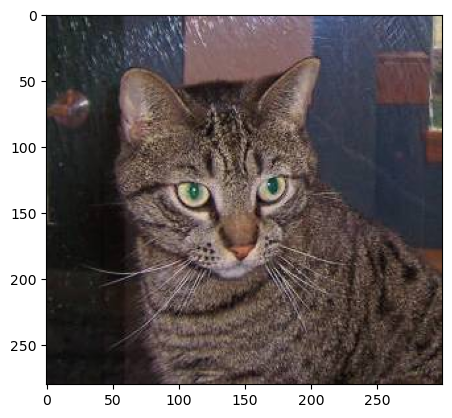

In [3]:
# Reading a single image from the drive

#First need to mount the drive and copy the path of the image

cat4 = cv2.imread('cat.1.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [4]:
cat4.shape #three color channel

(280, 300, 3)

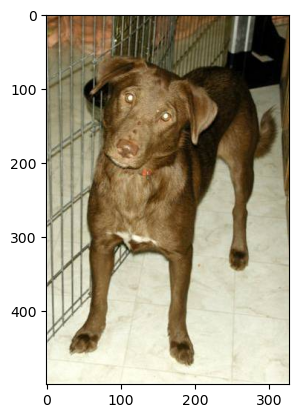

In [5]:
#Lets upload a DOG

dog = cv2.imread('dog.1.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [6]:
dog.shape

(499, 327, 3)

So we see images are not same size. So to make sure everytime we have any image, we need to pre-process the image. In Keras, we have a function <b> automatically process data and generate flow of batches from a directory -- > ImageDataGenerator</b> 

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# not only size will be different, there will be image fluctuations such as side or top view so that images are clearly visible.

image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest',)


#rotation range = randomly rotate images (minor)
#width_shift_range = shift the width a bit along x axis (%)
#height_shift_range = shift the height a bit along y axis (%)
#rescale = normalize by 255
#shear_range = cuts away part of the image
#zoom_range = zoom image
#horizontal_flip = along y axis
#vertical_flip = along x axis
#When we rescale, shifting, zoom, sheaer, there might be some missing pixels so we can fill those pixels by nearest pixel size

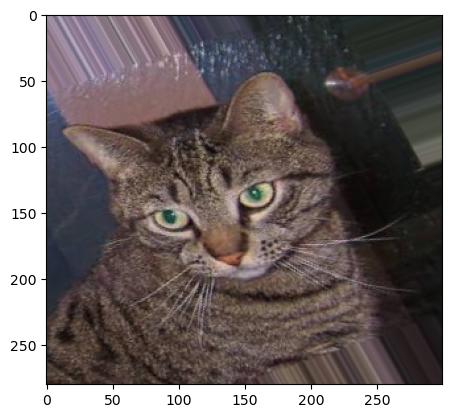

In [9]:
plt.imshow(image_gen.random_transform(cat4))

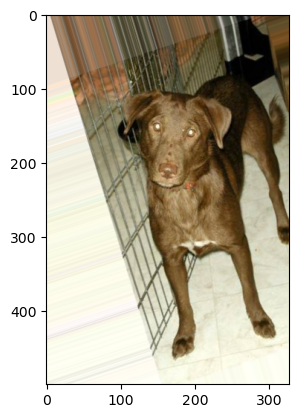

In [10]:
plt.imshow(image_gen.random_transform(dog)) #View 1

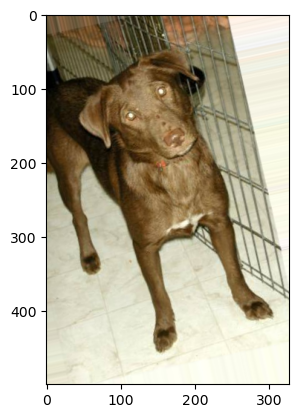

In [11]:
plt.imshow(image_gen.random_transform(dog)) #View 2

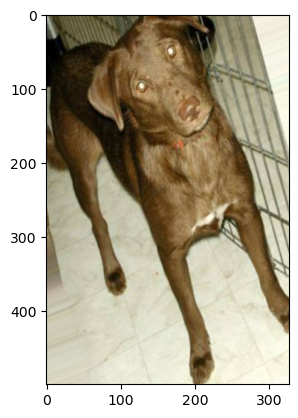

In [12]:
plt.imshow(image_gen.random_transform(dog)) #View 3

In [13]:
image_gen.flow_from_directory('train')

Found 8005 images belonging to 2 classes.


In [14]:
#Build and train out model now

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation

input_shape=(150,150,3)

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5)) #randomly turned 50% off neurons - help in overfitting

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [16]:
batch_size= 16

train_image_gen = image_gen.flow_from_directory('train',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory('test',
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [17]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Using epochs = 30 to achieve > 70% accuracy and can run 100 epochs to have 85 % accuracy

results = model.fit_generator(train_image_gen,epochs=30,steps_per_epoch=150,
                              validation_data=test_image_gen,validation_steps=12) #150*16 images per epoch to save training time

Epoch 1/30
150/150 [==============================] - 115s 746ms/step - loss: 0.6956 - accuracy: 0.5129 - val_loss: 0.6931 - val_accuracy: 0.4740
Epoch 2/30
150/150 [==============================] - 115s 768ms/step - loss: 0.6947 - accuracy: 0.5083 - val_loss: 0.6918 - val_accuracy: 0.5312
Epoch 3/30
150/150 [==============================] - 104s 691ms/step - loss: 0.6935 - accuracy: 0.4931 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
150/150 [==============================] - 108s 719ms/step - loss: 0.6929 - accuracy: 0.5052 - val_loss: 0.6904 - val_accuracy: 0.4948
Epoch 5/30
150/150 [==============================] - 107s 712ms/step - loss: 0.6924 - accuracy: 0.5178 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 6/30
150/150 [==============================] - 106s 708ms/step - loss: 0.6930 - accuracy: 0.5054 - val_loss: 0.6876 - val_accuracy: 0.5990
Epoch 7/30
150/150 [==============================] - 106s 709ms/step - loss: 0.6915 - accuracy: 0.5171 - val_loss: 0.6929 -

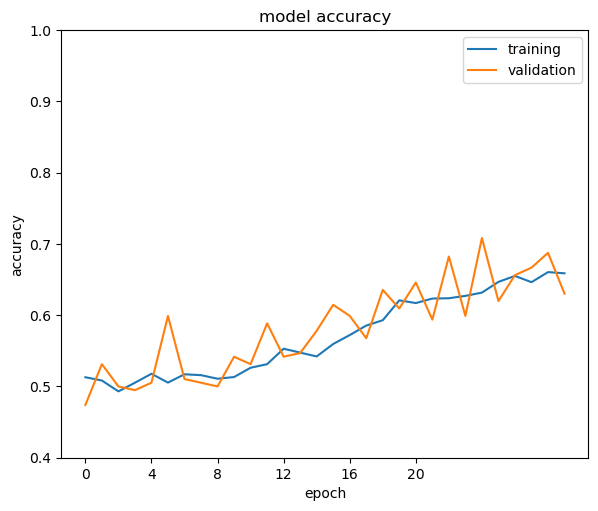

In [24]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])
  ax.set_ylim(0.4,1)
  ax.set_xticks([0,4,8,12,16,20])

plt.subplots(figsize=(6,10))
plt.tight_layout()
display_training_curves(results.history['accuracy'], results.history['val_accuracy'], 'accuracy', 211)

##### Prediction on images

In [20]:
import keras.utils as image
#from keras.preprocessing import image
import numpy as np
import tensorflow as tf

dog_file = 'dog.1.jpg'
dog_img = tf.keras.utils.load_img(dog_file,target_size=(150,150)) 
dog_img = image.img_to_array(dog_img) # to array #dog_img.shape = 150,150,3
# tf.keras.utils.load_img
#but we need to covnert this iamge to a batch so NN thinks it is a batch of 1 with this iamge dimensions

dog_img = np.expand_dims(dog_img,axis=0) #now dog_img.shape = 1,150,150,3

dog_img = dog_img/255 #normalize

In [21]:
model.predict(dog_img) #to predict class

1/1 [==============================] - 0s 408ms/step


array([[0.5900318]], dtype=float32)

In [22]:
#to check accuracy

model.predict(dog_img)

1/1 [==============================] - 0s 68ms/step


array([[0.5900318]], dtype=float32)